In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
mean = {1: 68.8, 2: 63.5, 3: 88.7, 4: 79.3,
    5: 90.8, 6: 203.1, 7: 136.3, 8: 182.7,
    9: 105, 10: 66, 11: 57.5, 12: 47}

days= {1: 31, 2: 29, 3: 31, 4: 30,
    5: 31, 6: 30, 7: 31, 8: 31,
    9: 30, 10: 31, 11: 30, 12: 31}
# 降水天数
nums = {1: 9.9, 2: 9.2, 3: 12.4, 4: 11.2,
    5: 10.4, 6: 12.7, 7: 11.4, 8: 12.3,
    9: 9.1, 10: 6.9, 11: 7.6, 12: 7.7}

In [12]:
def water_predict_zhou(m,d):
    p1 = mean[m]/days[d]
    return p1

In [13]:
water_predict_zhou(2,5)

2.0483870967741935

In [16]:
def water_predict_zhou2(m,d):
    r = np.random.uniform(0,1)
    if r <= nums[m]/days[m]:
        return mean[m]/nums[m]
    else:
        return 0

In [19]:
water_predict_zhou2(2,5)

6.9021739130434785

<BarContainer object of 12 artists>

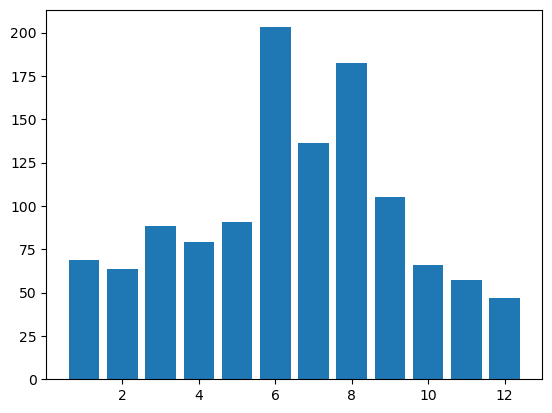

In [20]:
plt.bar(mean.keys(),mean.values())

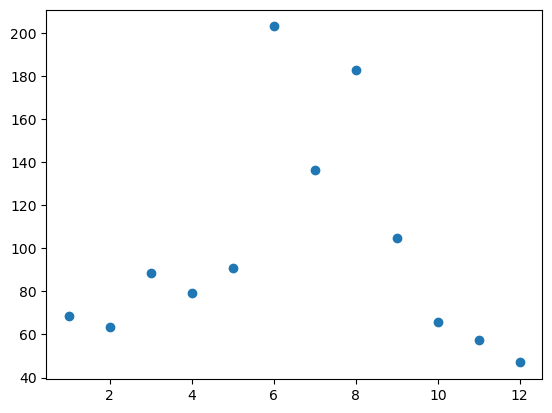

In [21]:
plt.scatter(mean.keys(),mean.values())

In [22]:
from scipy.interpolate import CubicSpline

In [25]:
x = list(mean.keys())
y = list(mean.values())

In [26]:
y1 = [i/30 for i in y]

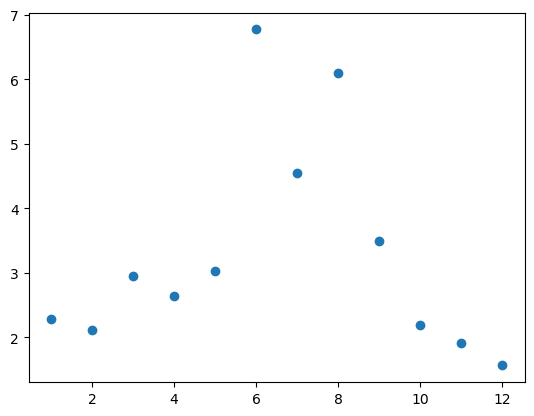

In [28]:
plt.scatter(x,y1)

In [29]:
pred_qixin = CubicSpline(x,y1)

In [30]:
xarray = np.linspace(1,12,1000)

In [31]:
yarray = pred_qixin(xarray)

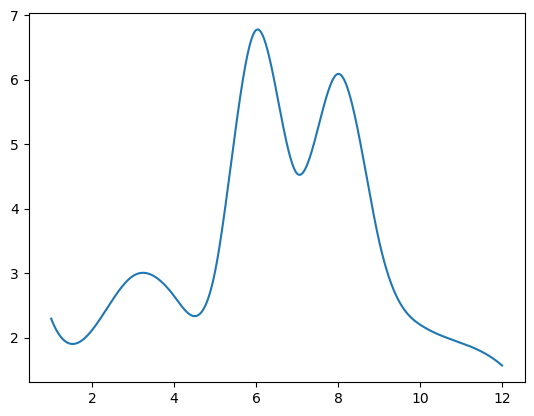

In [32]:
plt.plot(xarray,yarray)

In [45]:
from scipy.interpolate import interp1d

In [46]:
pred_qixin2 = interp1d(x,y1,kind='previous')

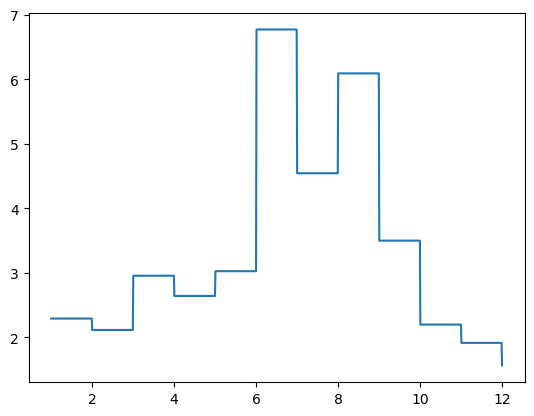

In [47]:
yarray2 = pred_qixin2(xarray)
plt.plot(xarray,yarray2)

In [40]:
help(interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  .. legacy:: class
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (npoints, ) array_like
 |      A 1-D array of real values.
 |  y : (..., npoints, ...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`. Use the ``axis`` parameter
 |      to select correct axis. Unlike other interpolators, the default
 |      interpolation axis is the last axis of `y`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a 

In [48]:
from scipy.optimize import curve_fit

In [49]:
def quad_func(x,a,b,c):
    return a*x**2+b*x+c

In [51]:
(a,b,c),_ = curve_fit(quad_func,x,y1)

In [52]:
a,b,c

(-0.1115126540150777, 1.436226273727217, 0.00674242424029603)

In [53]:
yarray3 = [quad_func(x1,a,b,c) for x1 in xarray]

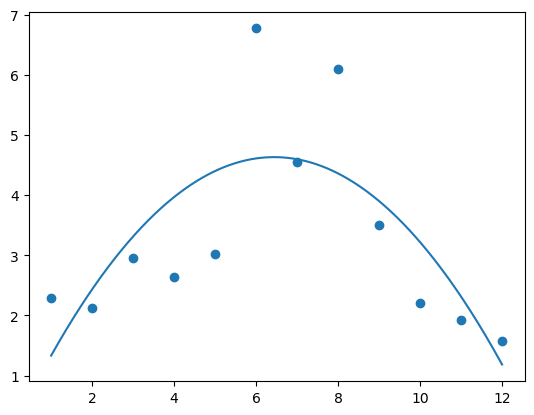

In [55]:
plt.plot(xarray,yarray3)
plt.scatter(x,y1)

In [56]:
def cubic_func(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

In [58]:
(a,b,c,d),_ = curve_fit(cubic_func,x,y1)

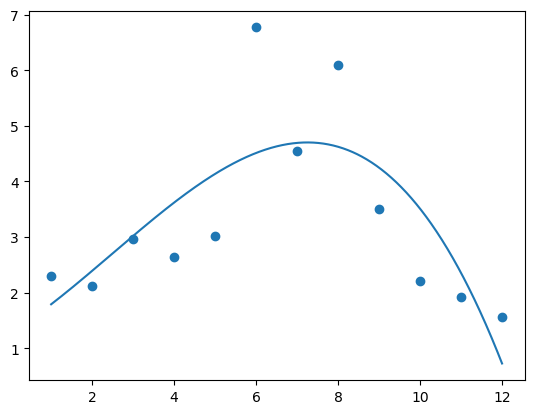

In [60]:
yarray4 = [cubic_func(x1,a,b,c,d) for x1 in xarray]
plt.plot(xarray,yarray4)
plt.scatter(x,y1)

In [61]:
import networkx as nx

In [62]:
nodes = ['A','B','C','D','E']

In [63]:
edges = [('A','C'),('C','D'),('B','D'),('D','E')]

In [64]:
G = nx.Graph()

In [65]:
G.add_nodes_from(nodes)

In [66]:
G.add_edges_from(edges)

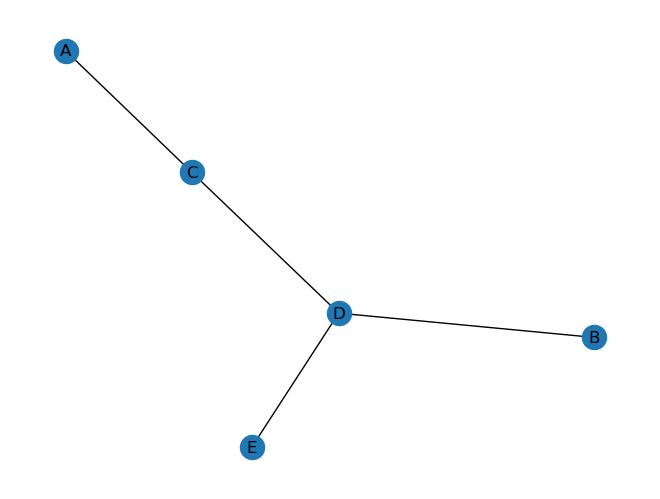

In [68]:
nx.draw(G,with_labels=True)

In [69]:
nx.shortest_path(G,'A','E')

['A', 'C', 'D', 'E']